IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

LOAD THE DATASET

In [ ]:
deliveries_path = '/content/deliveries.csv'
matches_path = '/content/matches.csv'

deliveries_data = pd.read_csv(deliveries_path)
matches_data = pd.read_csv(matches_path)

CLEAN THE DATASET

In [ ]:
#matches_data = matches_data.drop_duplicates()
#deliveries_data = deliveries_data.drop_duplicates()

matches_data = matches_data.fillna({'city': 'Unknown', 'winner': 'No Result'})
deliveries_data = deliveries_data.fillna({'extras_type': 'None', 'player_dismissed': 'None', 'dismissal_kind': 'None', 'fielder': 'None'})

matches_data.drop(columns=['umpire1', 'umpire2'], inplace=True)

In [ ]:
matches_data.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
0,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223,20.0,N,NaN
1,335983,2008,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241,20.0,N,NaN
2,335984,2008,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130,20.0,N,NaN
3,335985,2008,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166,20.0,N,NaN
4,335986,2008,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111,20.0,N,NaN
5,335987,2008,Jaipur,21-04-2008,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167,20.0,N,NaN
6,335988,2008,Hyderabad,22-04-2008,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143,20.0,N,NaN
7,335989,2008,Chennai,23-04-2008,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209,20.0,N,NaN
8,335990,2008,Hyderabad,24-04-2008,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215,20.0,N,NaN
9,335991,2008,Chandigarh,25-04-2008,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183,20.0,N,NaN


In [ ]:
deliveries_data.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,None,None,None
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,None,None,None
2,335982,1,KKR,RCB,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,None,None,None
3,335982,1,KKR,RCB,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,None,None,None
4,335982,1,KKR,RCB,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,None,None,None
5,335982,1,KKR,RCB,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,None,None,None
6,335982,1,KKR,RCB,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,None,None,None
7,335982,1,KKR,RCB,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,None,0,None,None,None
8,335982,1,KKR,RCB,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,None,0,None,None,None
9,335982,1,KKR,RCB,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,None,0,None,None,None


REDUCING TEAM NAMES TO SHORTCUTS AND MERGING DUPLICATE VENUE  DETAILS

In [ ]:
team_name_mapping = {
    'Chennai Super Kings': 'CSK',
    'Delhi Daredevils': 'DC',
    'Delhi Capitals': 'DC',
    'Kings XI Punjab': 'PBKS',
    'Punjab Kings': 'PBKS',
    'Kolkata Knight Riders': 'KKR',
    'Mumbai Indians': 'MI',
    'Rajasthan Royals': 'RR',
    'Kochi Tuskers Kerala': 'KTK',
    'Royal Challengers Bangalore': 'RCB',
    'Royal Challengers Bengaluru': 'RCB',
    'Sunrisers Hyderabad': 'SRH',
    'Deccan Chargers': 'SRH',
    'Rising Pune Supergiants': 'RPS',
    'Rising Pune Supergiant': 'RPS',
    'Gujarat Lions': 'GL',
    'Pune Warriors': 'PW',
    'Lucknow Super Giants': 'LSG',
    'Gujarat Titans': 'GT'
}

venue_mapping = {
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association Stadium': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association Stadium',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium',
    'Narendra Modi Stadium, Ahmedabad': 'Narendra Modi Stadium',
}

matches_data['venue'] = matches_data['venue'].replace(venue_mapping)

matches_data['team1'] = matches_data['team1'].replace(team_name_mapping)
matches_data['team2'] = matches_data['team2'].replace(team_name_mapping)
matches_data['winner'] = matches_data['winner'].replace(team_name_mapping)
matches_data['toss_winner'] = matches_data['toss_winner'].replace(team_name_mapping)
deliveries_data['batting_team'] = deliveries_data['batting_team'].replace(team_name_mapping)
deliveries_data['bowling_team'] = deliveries_data['bowling_team'].replace(team_name_mapping)

list1=matches_data['team1'].unique()
print(list1)

list2=matches_data['venue'].unique()
print(np.sort(list2))
print(len(list2))

list3=matches_data['toss_winner'].unique()
print(list3)

['RCB' 'PBKS' 'DC' 'MI' 'KKR' 'RR' 'SRH' 'CSK' 'KTK' 'PW' 'GL' 'RPS' 'LSG'
 'GT']
['Arun Jaitley Stadium' 'Barabati Stadium'
 'Barsapara Cricket Stadium, Guwahati'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'
 'Brabourne Stadium' 'Buffalo Park' 'De Beers Diamond Oval'
 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'JSCA International Stadium Complex' 'Kingsmead' 'M Chinnaswamy Stadium'
 'MA Chidambaram Stadium'
 'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur'
 'Maharashtra Cricket Association Stadium' 'Narendra Modi Stadium'
 'Nehru Stadium' 'New Wanderers Stadium' 'Newlands' 'OUTsurance Oval'
 'Punjab Cricket Association Stadium' 'Rajiv Gandhi International Stadium'
 'Saurashtra Cricket Association Stadium' 'Sawai Mansingh Stadium'
 'Shaheed Veer Narayan Singh 

In [ ]:
matches_data.to_csv('matches_processed.csv', index=False)
deliveries_data.to_csv('deliveries_processed.csv', index=False)

Outlier Details:
      season  match_id  total_runs IsOutlier
39      2008    336021         135   Outlier
60      2009    392183         162   Outlier
146     2010    419137         469   Outlier
173     2010    419164         168   Outlier
191     2011    501214         166   Outlier
221     2011    501245         175   Outlier
241     2011    501265          56   Outlier
368     2013    598044         161   Outlier
411     2014    729305         141   Outlier
561     2016    980989         169   Outlier
611     2017   1082626         135   Outlier
630     2017   1082645         151   Outlier
633     2017   1082648         176   Outlier
696     2019   1175356         141   Outlier
744     2019   1178424         103   Outlier
758     2020   1216494         169   Outlier
911     2022   1304082         140   Outlier
994     2023   1359519         125   Outlier
1031    2024   1422126         523   Outlier
1053    2024   1426268         549   Outlier
1058    2024   1426273         465   O

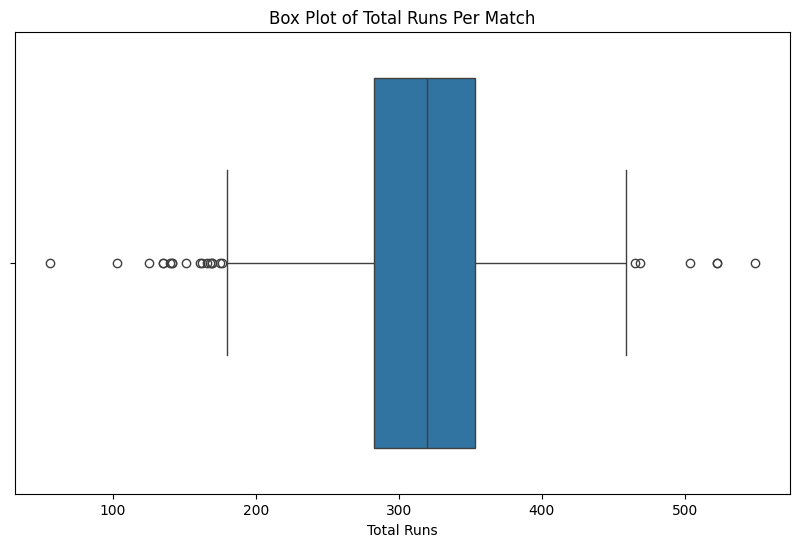

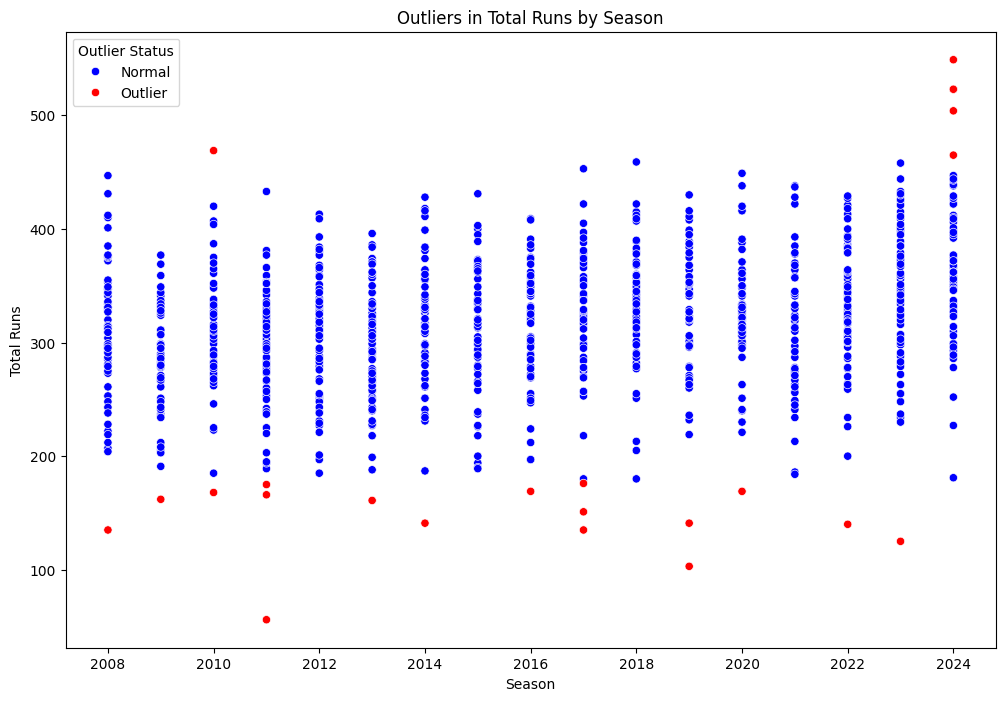

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
matches_path = "/content/matches_processed.csv"
deliveries_path = "/content/deliveries_processed.csv"

matches = pd.read_csv(matches_path)
deliveries = pd.read_csv(deliveries_path)

# Merge datasets on match_id to include season in deliveries dataset
merged_data = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Calculate total runs per match and season
season_runs = merged_data.groupby(['season', 'match_id'])['total_runs'].sum().reset_index()

# Calculate Q1, Q3, and IQR for total runs
Q1 = season_runs['total_runs'].quantile(0.25)
Q3 = season_runs['total_runs'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers in a new column
season_runs['IsOutlier'] = np.where(
    (season_runs['total_runs'] < lower_bound) | (season_runs['total_runs'] > upper_bound),
    'Outlier',
    'Normal'
)

# Merge outlier data back to include season and match details
season_outliers = merged_data.merge(season_runs[['match_id', 'IsOutlier']], on='match_id', how='left')

# Summary
print("Outlier Details:")
print(season_runs[season_runs['IsOutlier'] == 'Outlier'])

# Visualization
# A. Box Plot for Total Runs
plt.figure(figsize=(10, 6))
sns.boxplot(x=season_runs['total_runs'])
plt.title('Box Plot of Total Runs Per Match')
plt.xlabel('Total Runs')
plt.show()

# B. Scatter Plot: Outliers by Season
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=season_runs,
    x='season',
    y='total_runs',
    hue='IsOutlier',
    palette={'Outlier': 'red', 'Normal': 'blue'}
)
plt.title('Outliers in Total Runs by Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend(title='Outlier Status')
plt.show()


Correlation Matrix:
                  over      ball  batsman_runs  extra_runs  total_runs  \
over          1.000000 -0.001241      0.080040    0.004437    0.081610   
ball         -0.001241  1.000000      0.004391    0.000176    0.004463   
batsman_runs  0.080040  0.004391      1.000000   -0.142079    0.977934   
extra_runs    0.004437  0.000176     -0.142079    1.000000    0.067852   
total_runs    0.081610  0.004463      0.977934    0.067852    1.000000   
is_wicket     0.072963  0.004258     -0.171751   -0.041903   -0.181955   
season        0.010881  0.004824      0.036320   -0.004712    0.035614   

              is_wicket    season  
over           0.072963  0.010881  
ball           0.004258  0.004824  
batsman_runs  -0.171751  0.036320  
extra_runs    -0.041903 -0.004712  
total_runs    -0.181955  0.035614  
is_wicket      1.000000  0.001204  
season         0.001204  1.000000  


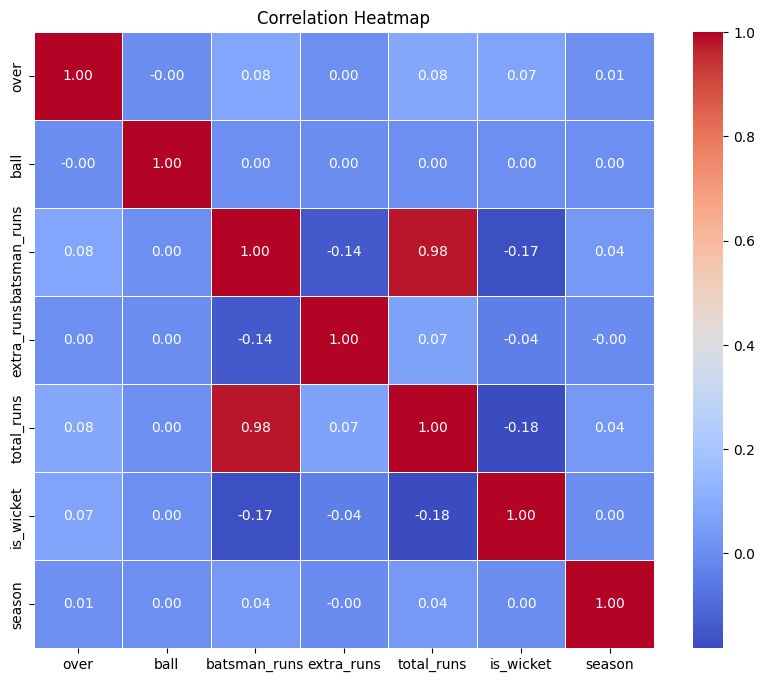

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
matches_path = "/content/matches_processed.csv"
deliveries_path = "/content/deliveries_processed.csv"

matches = pd.read_csv(matches_path)
deliveries = pd.read_csv(deliveries_path)

# Merge datasets on match_id to align data
merged_data = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Select relevant numerical columns
numerical_columns = [
    'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs',
    'is_wicket', 'season'
]

# Ensure the selected columns exist in the data
correlation_data = merged_data[numerical_columns]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
teams = pd.concat([matches_data['team1'], matches_data['team2']]).drop_duplicates().reset_index(drop=True)
print("Union of Column1 and Column2:")
print(teams)
teams.to_csv('teams.csv', index=False)

Union of Column1 and Column2:
0      RCB
1     PBKS
2       DC
3       MI
4      KKR
5       RR
6      SRH
7      CSK
8      KTK
9       PW
10      GL
11     RPS
12     LSG
13      GT
dtype: object


 A. **VISUALIZE MATCH OUTCOMES (WIN/LOSS) ACROSS DIFFERENT YEARS**
 [MANOJ]

<ipython-input-11-4e9cd52ae1de>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_team_played = matches_data.groupby(['season']).apply(


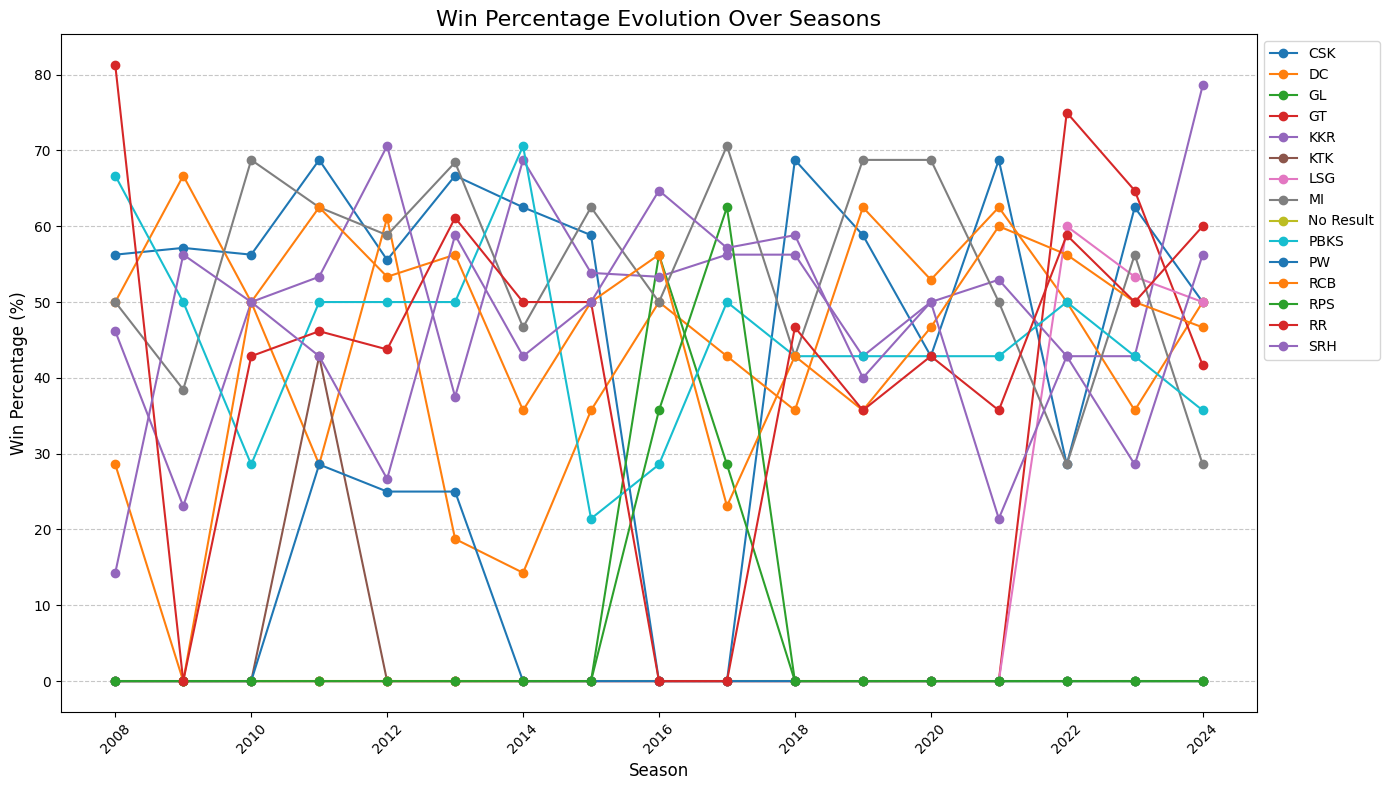

In [ ]:
matches_played = (
    matches_data['team1'].value_counts() +
    matches_data['team2'].value_counts()
).sort_index()

team_wins = matches_data['winner'].value_counts().sort_index()

win_percentage = (team_wins / matches_played * 100).dropna()

season_team_wins = matches_data.groupby(['season', 'winner']).size().unstack(fill_value=0)
season_team_played = matches_data.groupby(['season']).apply(
    lambda x: x['team1'].value_counts() + x['team2'].value_counts()
).unstack(fill_value=0)

season_win_percentage = (season_team_wins / season_team_played * 100).fillna(0)

plt.figure(figsize=(14, 8))
for team in season_win_percentage.columns:
    plt.plot(season_win_percentage.index, season_win_percentage[team], marker='o', label=team)

plt.title('Win Percentage Evolution Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

pie_chart_data = pd.DataFrame({
    'Team': win_percentage.index,
    'Win Percentage': win_percentage.values
})

fig = px.pie(
    pie_chart_data,
    names='Team',
    values='Win Percentage',
    title='Overall Win Percentage by Team',
    template='plotly_white',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_traces(textinfo='percent+label', pull=[0.1 if v == max(win_percentage.values) else 0 for v in win_percentage.values])
fig.show()

B. **ANALYZE TEAM PERFORMANCE BASED ON HISTORICAL DATA** [MANOJ]

In [ ]:
team_wins = matches_data['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

fig = px.bar(
    team_wins,
    x='Team',
    y='Wins',
    color='Team',
    text='Wins',
    title='Total Wins by Team',
    labels={'Team': 'Team', 'Wins': 'Number of Wins'},
    template='plotly_white',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Number of Wins',
    title_font_size=16,
    showlegend=False
)

fig.update_traces(textposition='outside')

fig.show()

C. **SEASONAL TRENDS FOR ALL TEAMS** [MANOJ]

In [ ]:
seasonal_wins = matches_data.groupby(['season', 'winner']).size().reset_index(name='wins')

fig = px.scatter(
    seasonal_wins,
    x='season',
    y='wins',
    color='winner',
    hover_name='winner',
    hover_data={
        'wins': True,
        'winner': False
    },
    title='Seasonal Wins for Each Team',
    labels={'season': 'Season', 'wins': 'Number of Wins'},
    template='plotly_white',
    #size='wins',
)

for team in seasonal_wins['winner'].unique():
    team_data = seasonal_wins[seasonal_wins['winner'] == team]
    fig.add_scatter(
        x=team_data['season'],
        y=team_data['wins'],
        mode='lines',
        name=team,
        line=dict(width=2)
    )

fig.update_layout(
    xaxis_title='Season',
    yaxis_title='Number of Wins',
    legend_title='Teams',
    hovermode='x unified',
    title_font_size=16,
    showlegend=True
)

fig.show()

**D. WICKETS TAKEN PER BOWLER[HORIZONTAL DOT PLOT CHART]** [VAIBHAV NEGI]

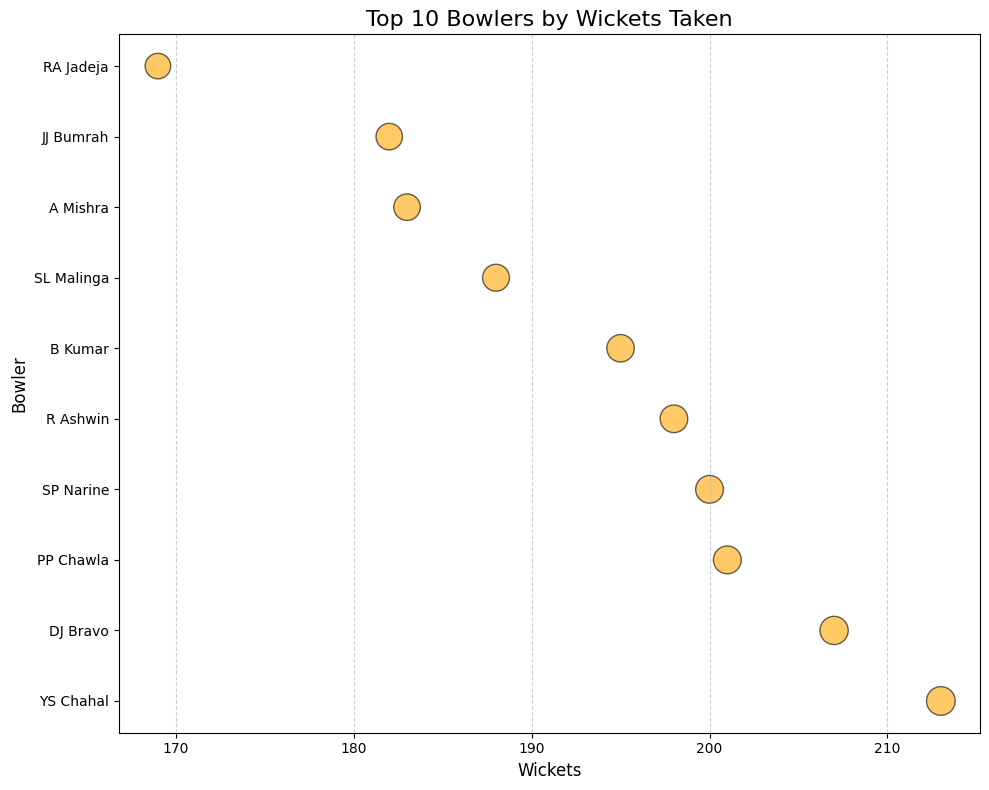

In [ ]:
wickets_data = deliveries_data[deliveries_data['is_wicket'] == 1]

wickets_by_bowler = wickets_data.groupby('bowler').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))

plt.scatter(wickets_by_bowler.values, range(len(wickets_by_bowler)),s=wickets_by_bowler.values*2, alpha=0.6, color='orange', edgecolors='black')

plt.yticks(range(len(wickets_by_bowler)), wickets_by_bowler.index)
plt.title('Top 10 Bowlers by Wickets Taken', fontsize=16)
plt.xlabel('Wickets', fontsize=12)
plt.ylabel('Bowler', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**E.  AVERAGE RUNS PER OVER ACROSS MATCHES [LINE CHART]** [VAIBHAV NEGI]

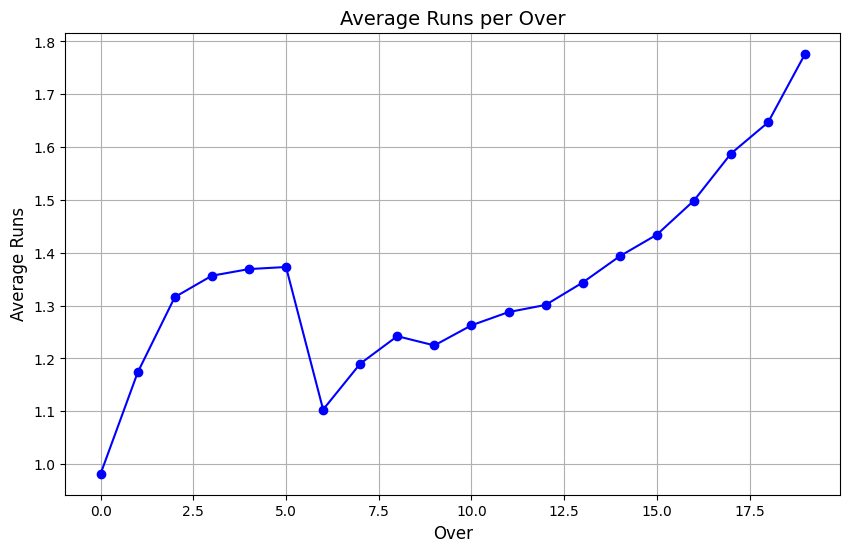

In [ ]:
runs_per_over = deliveries_data.groupby('over')['total_runs'].mean()

plt.figure(figsize=(10, 6))
plt.plot(runs_per_over.index, runs_per_over.values, marker='o', color='blue')
plt.title('Average Runs per Over', fontsize=14)
plt.xlabel('Over', fontsize=12)
plt.ylabel('Average Runs', fontsize=12)
plt.grid(True)
plt.show()

**F. COMPARE TEAM PERFORMANCE USING LINE AND PIE CHARTS FOR WIN PERCENTAGE** [MANOJ]

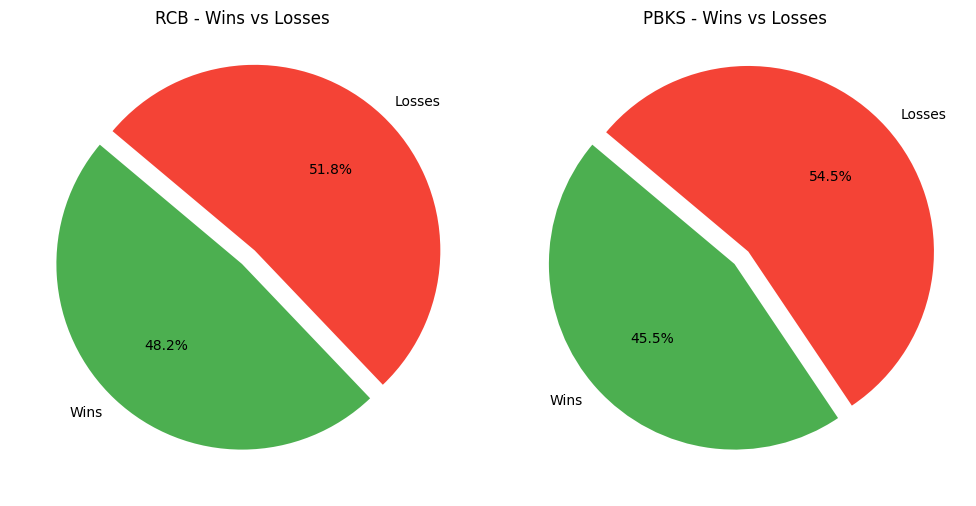

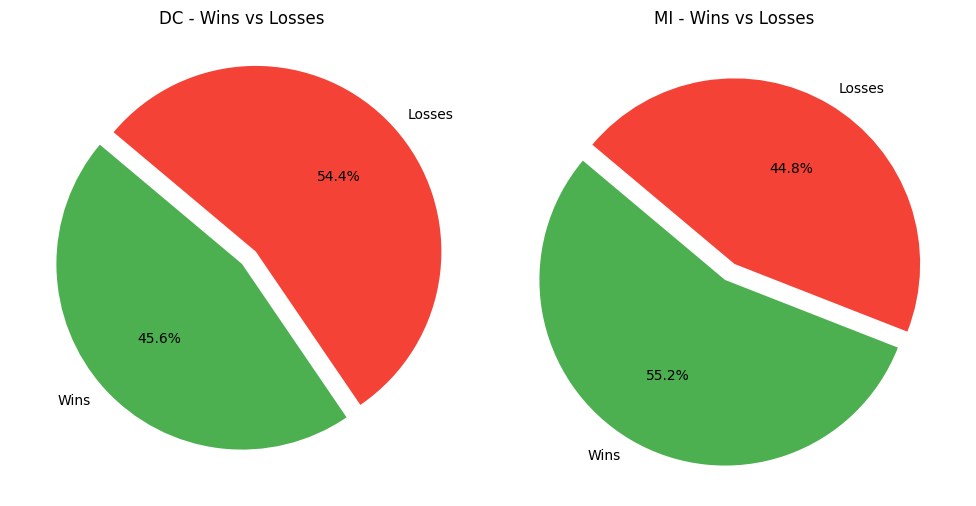

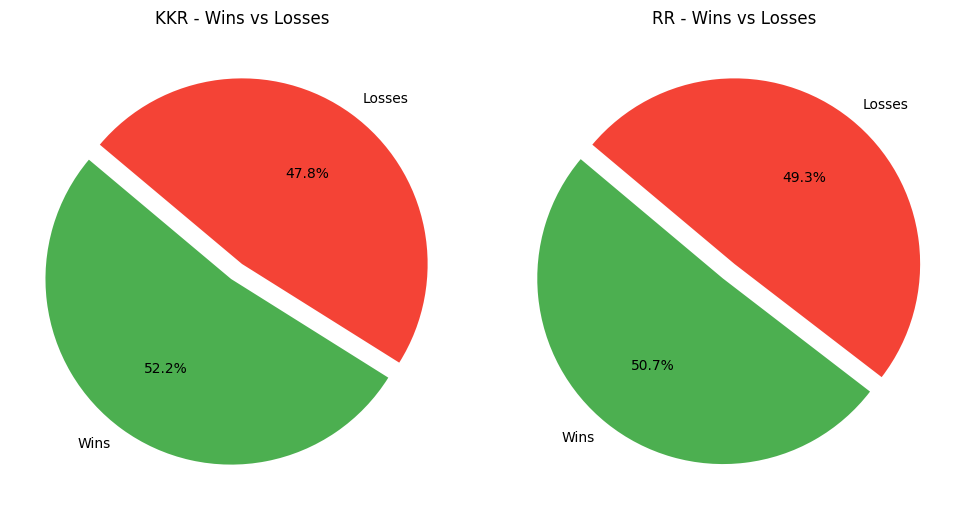

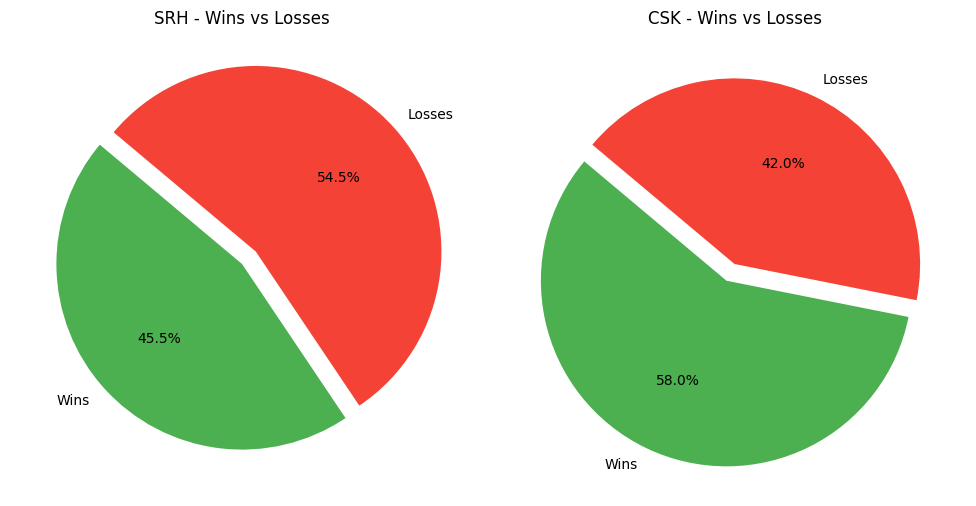

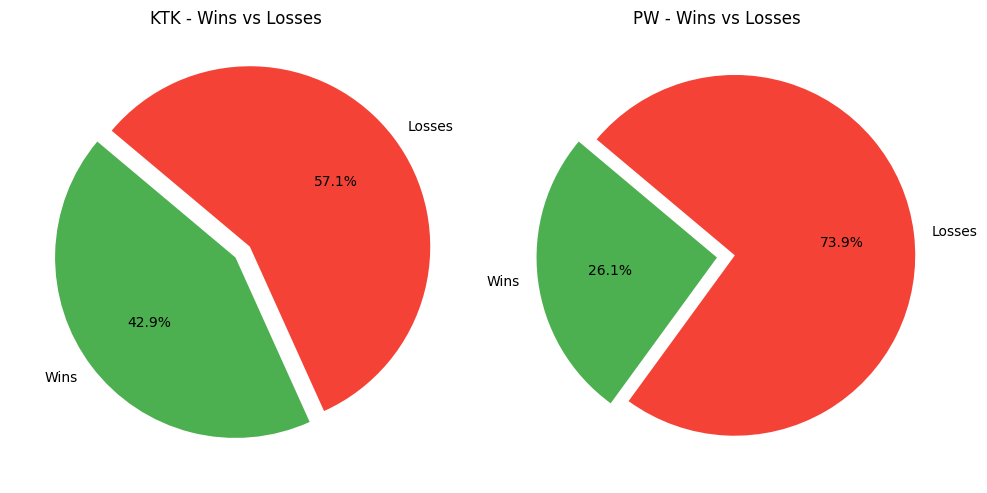

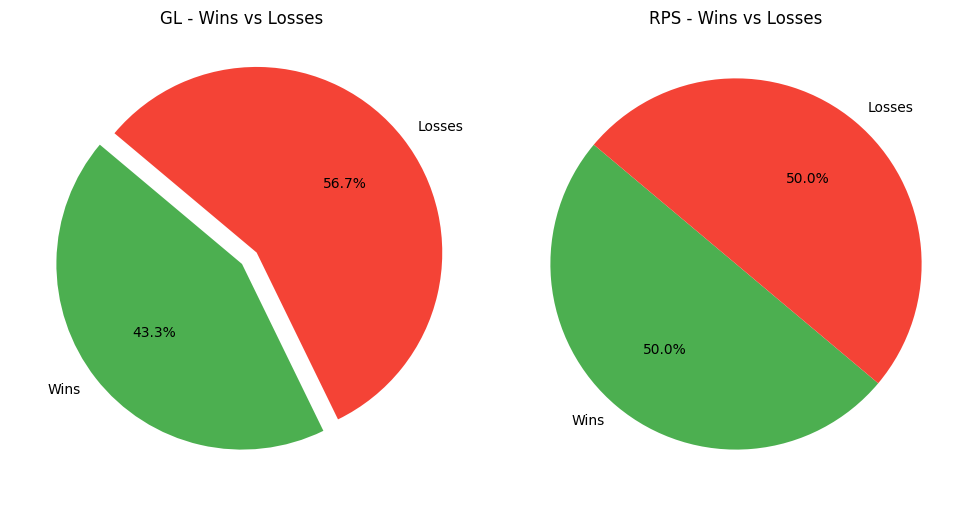

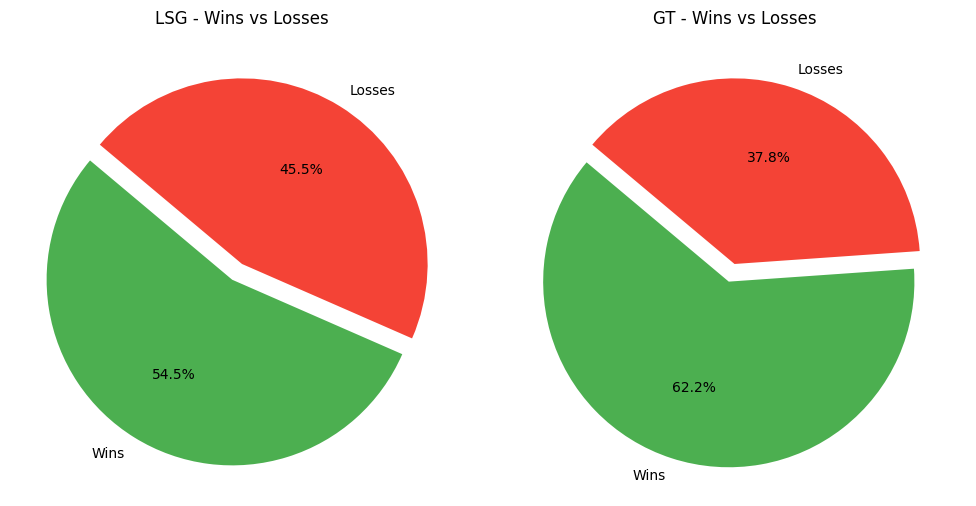

In [ ]:
total_matches = matches_data['team1'].value_counts() + matches_data['team2'].value_counts()
team_wins = matches_data['winner'].value_counts()
team_losses = total_matches - team_wins
team_losses = team_losses.fillna(0)

for i in range(0, len(list1), 2):
    teams = list1[i:i+2]
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    for j, team in enumerate(teams):
        if team in team_wins.index:
            wins = team_wins[team]
        else:
            wins = 0
        losses = total_matches[team] - wins if team in total_matches else 0

        data = [wins, losses]
        labels = ['Wins', 'Losses']

        if wins > losses:
            explode = [0.1, 0]
        elif losses > wins:
            explode = [0, 0.1]
        else:
            explode = [0, 0]

        colors = ['#4CAF50', '#F44336']  # Green for wins, red for losses

        axes[j].pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
        axes[j].set_title(f'{team} - Wins vs Losses', fontsize=12)

    plt.tight_layout()
    plt.show()

**G. BOWLER'S ECONOMY PER OVER** [MANOJ]

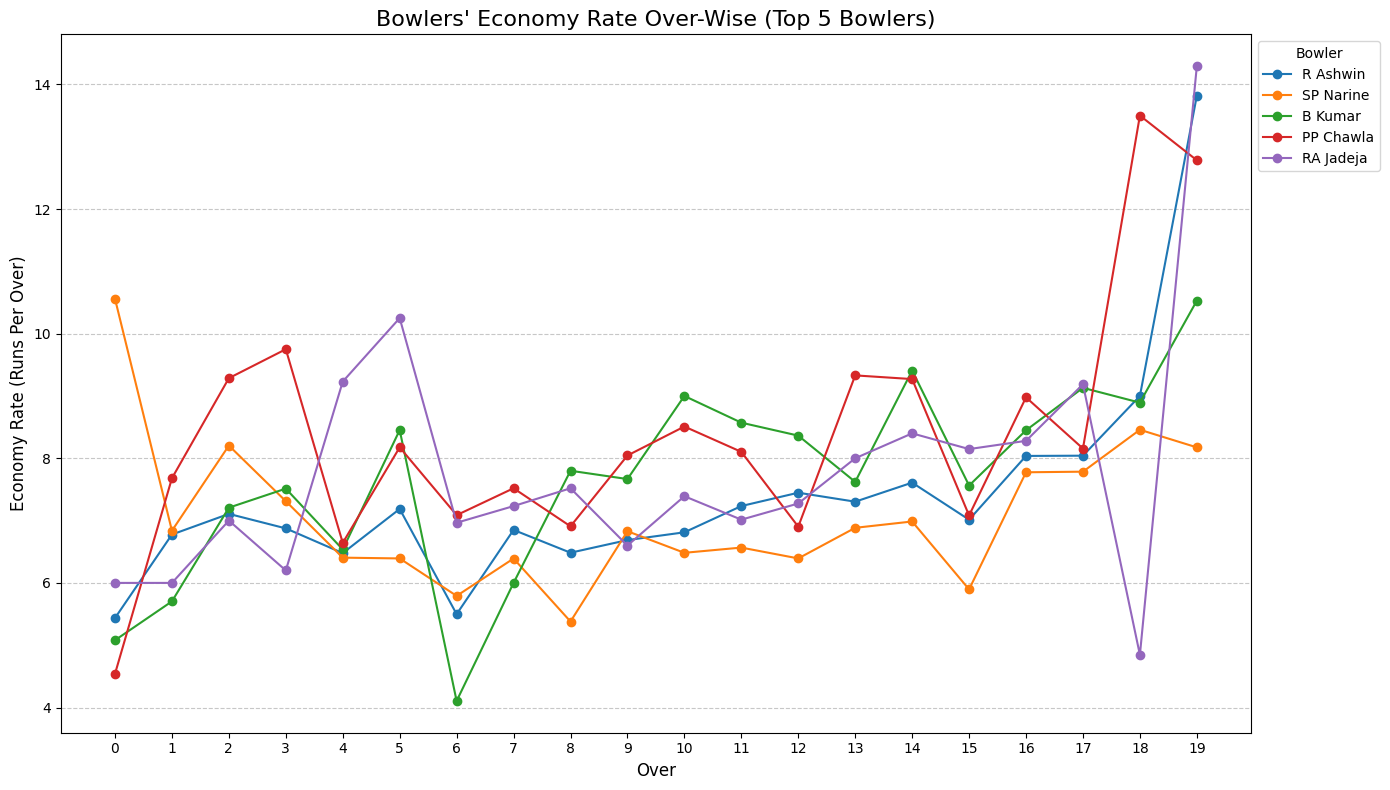

In [ ]:
bowlers_economy = deliveries_data.groupby(['bowler', 'over']).agg(
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
).reset_index()

bowlers_economy['economy_rate'] = (bowlers_economy['runs_conceded'] /
                                   (bowlers_economy['balls_bowled'] / 6))

top_bowlers = deliveries_data['bowler'].value_counts().head(5).index
top_bowlers_economy = bowlers_economy[bowlers_economy['bowler'].isin(top_bowlers)]

plt.figure(figsize=(14, 8))
for bowler in top_bowlers:
    bowler_data = top_bowlers_economy[top_bowlers_economy['bowler'] == bowler]
    plt.plot(bowler_data['over'], bowler_data['economy_rate'], marker='o', label=bowler)

plt.title('Bowlers\' Economy Rate Over-Wise (Top 5 Bowlers)', fontsize=16)
plt.xlabel('Over', fontsize=12)
plt.ylabel('Economy Rate (Runs Per Over)', fontsize=12)
plt.xticks(range(0, max(deliveries_data['over']) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Bowler', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**H. MOST FINALIST OF IPL** [MANOJ]

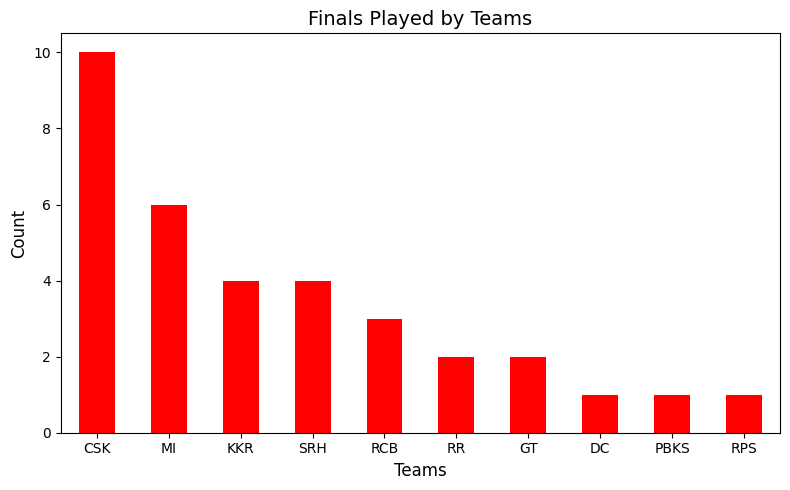

In [ ]:
finals_data = matches_data[matches_data['match_type'] == 'Final']

final_teams = pd.concat([finals_data['team1'], finals_data['team2']]).value_counts()

plt.figure(figsize=(8, 5))
final_teams.plot(kind='bar',color='red')
plt.title('Finals Played by Teams', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0,fontsize=10)
plt.tight_layout()
plt.show()

**I. TOTAL MATCHES PLAYED AT A VENUE AND WIN COUNT AT EACH VENUE** [MANOJ]

                                                venue  total_matches  \
0                                Arun Jaitley Stadium             90   
1                                    Barabati Stadium              7   
2                 Barsapara Cricket Stadium, Guwahati              3   
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...             14   
4                                   Brabourne Stadium             27   
5                                        Buffalo Park              3   
6                               De Beers Diamond Oval              3   
7                          Dr DY Patil Sports Academy             37   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...             15   
9                 Dubai International Cricket Stadium             46   
10                                       Eden Gardens             93   
11                                         Green Park              4   
12       Himachal Pradesh Cricket Association Stadium           

<ipython-input-20-74adc2c3264a>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




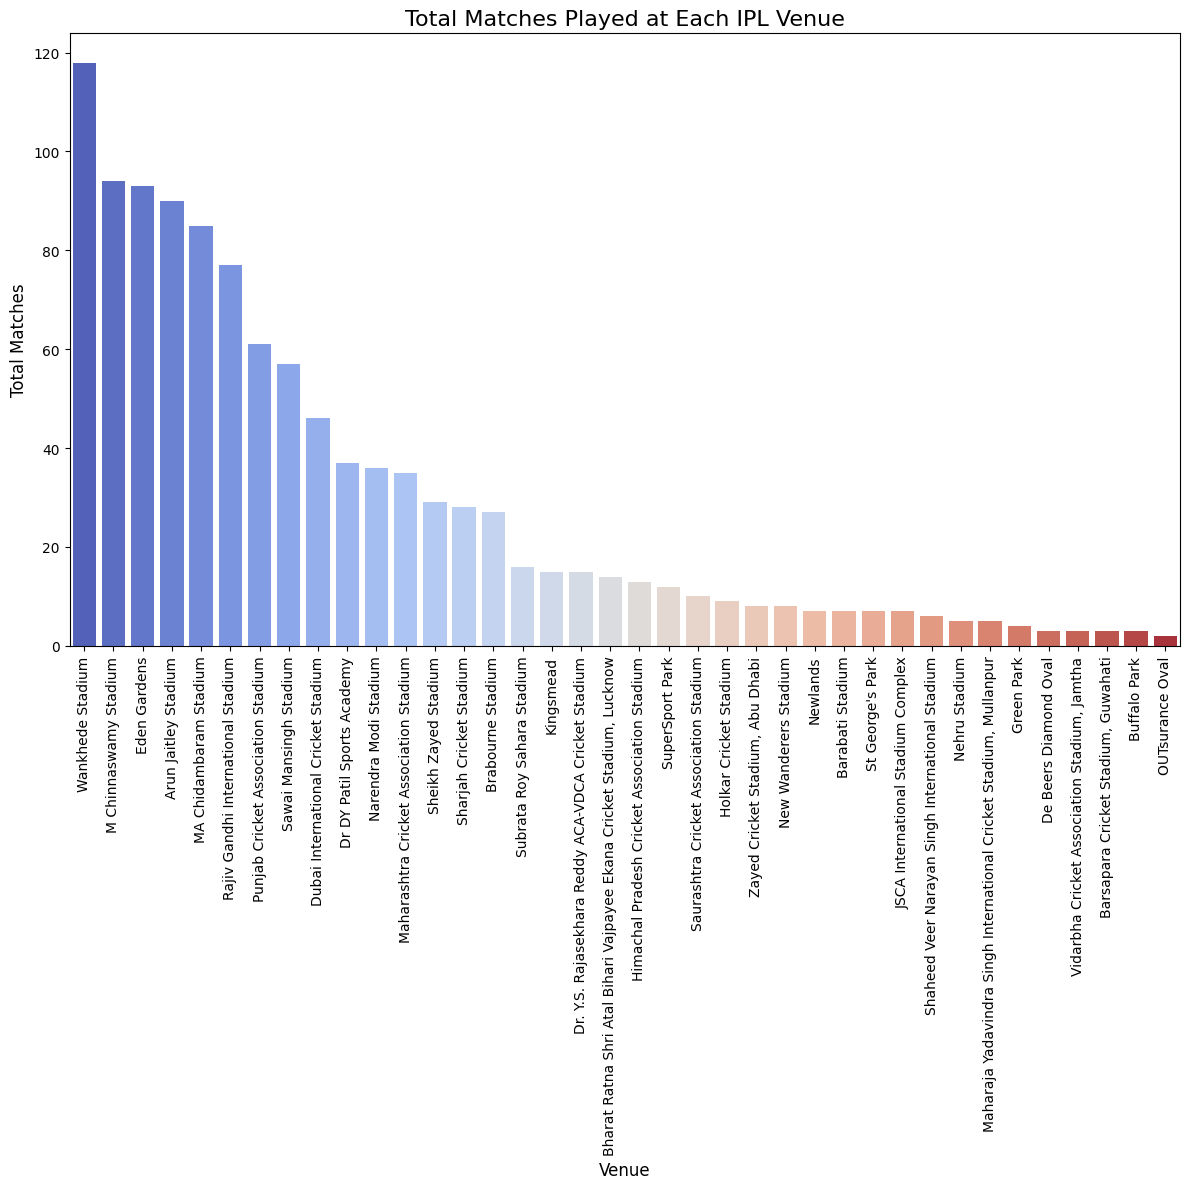

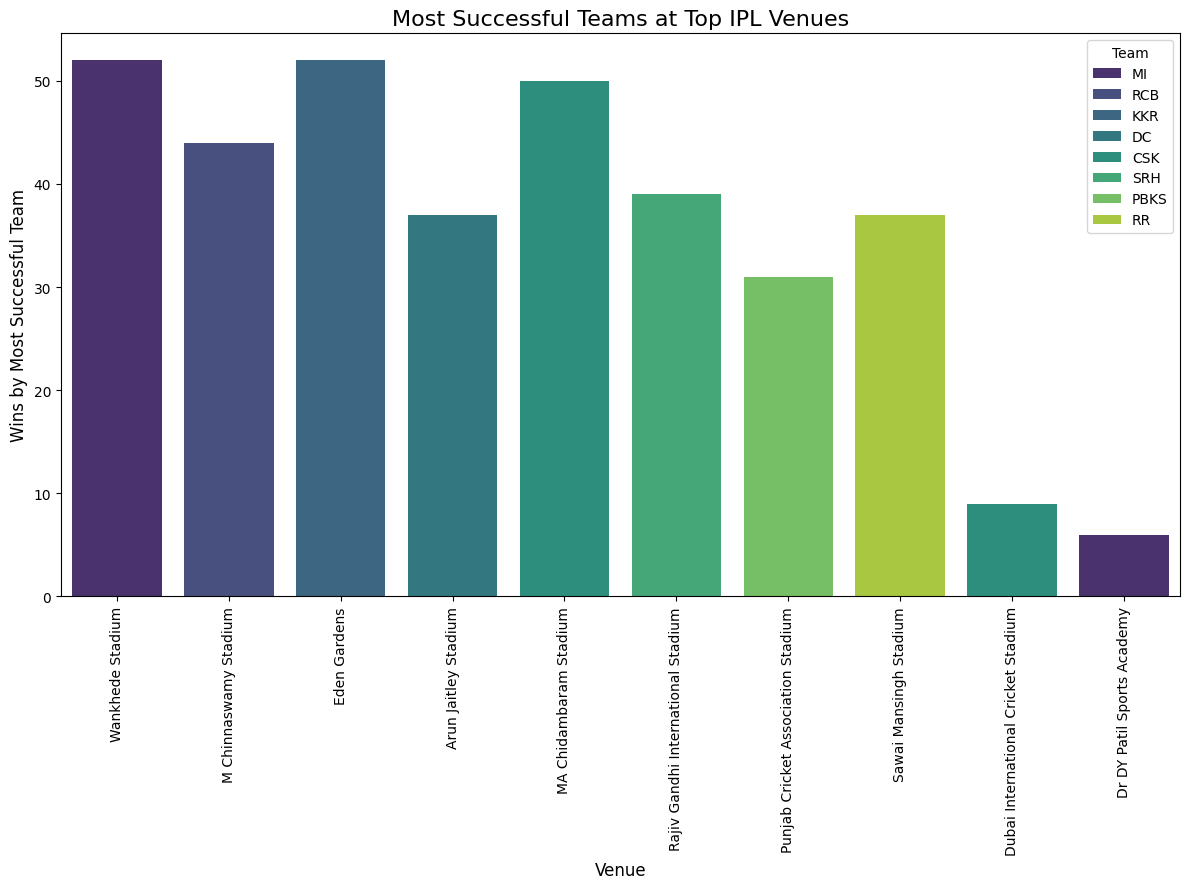

In [ ]:
venue_analysis = matches_data.groupby('venue').agg(
    total_matches=('id', 'count'),
    most_wins=('winner', lambda x: x.value_counts().idxmax()),
    most_wins_count=('winner', lambda x: x.value_counts().max())
).reset_index()

print(venue_analysis)

venue_analysis = venue_analysis.sort_values(by='total_matches', ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(
    x=venue_analysis['venue'],
    y=venue_analysis['total_matches'],
    palette='coolwarm'
)
plt.title('Total Matches Played at Each IPL Venue', fontsize=16)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Total Matches', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9))
top_venues = venue_analysis.head(10)
sns.barplot(
    x=top_venues['venue'],
    y=top_venues['most_wins_count'],
    hue=top_venues['most_wins'],
    dodge=False,
    palette='viridis'
)
plt.title('Most Successful Teams at Top IPL Venues', fontsize=16)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Wins by Most Successful Team', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Team', loc='upper right')
plt.tight_layout()
plt.show()

**J. PERFORMANCE OF TEAMS AT EACH VENUE IN HEATMAP** [MANOJ]

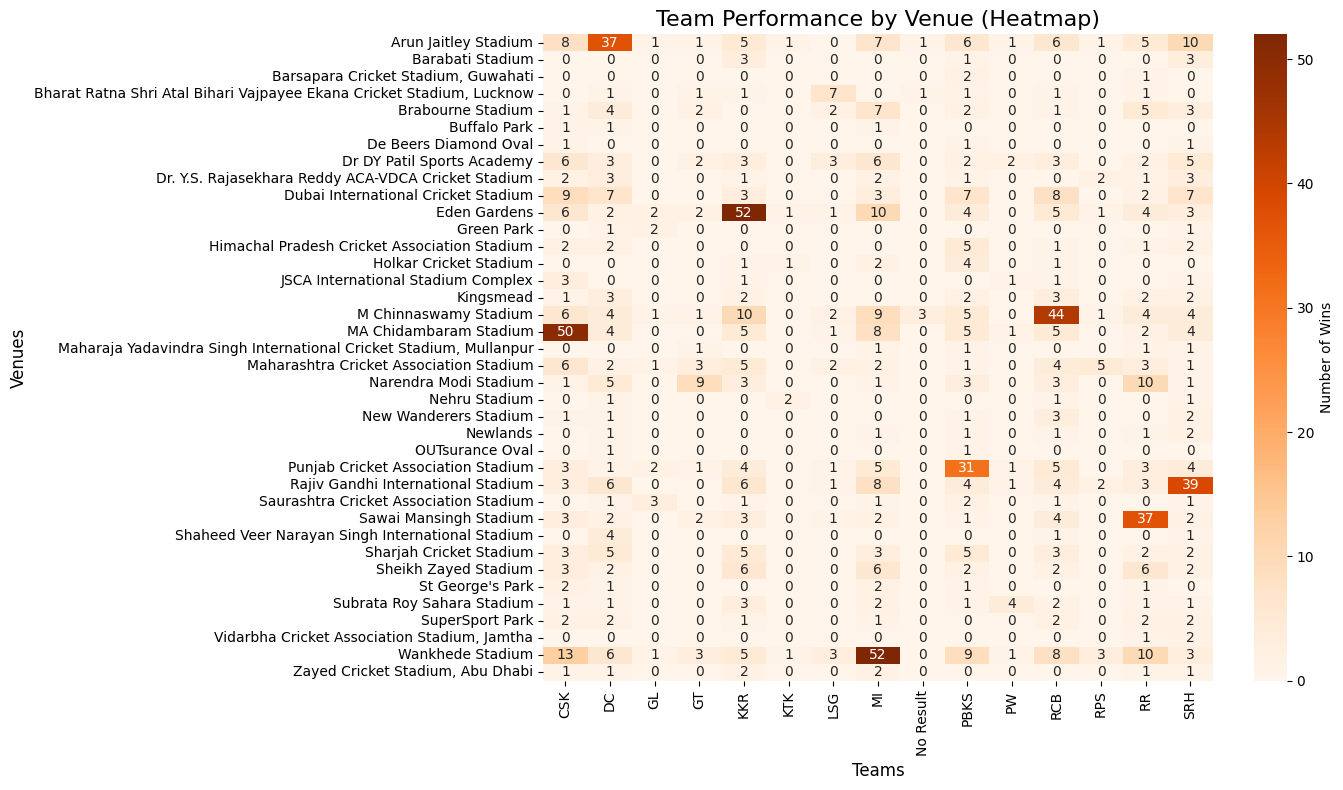

In [ ]:
venue_performance = matches_data.groupby(['venue', 'winner']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(venue_performance, annot=True, fmt="d", cmap="Oranges", cbar_kws={'label': 'Number of Wins'})
plt.title('Team Performance by Venue (Heatmap)', fontsize=16)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Venues', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**K. MOST CATCHES BY A PLAYER** [MANOJ]

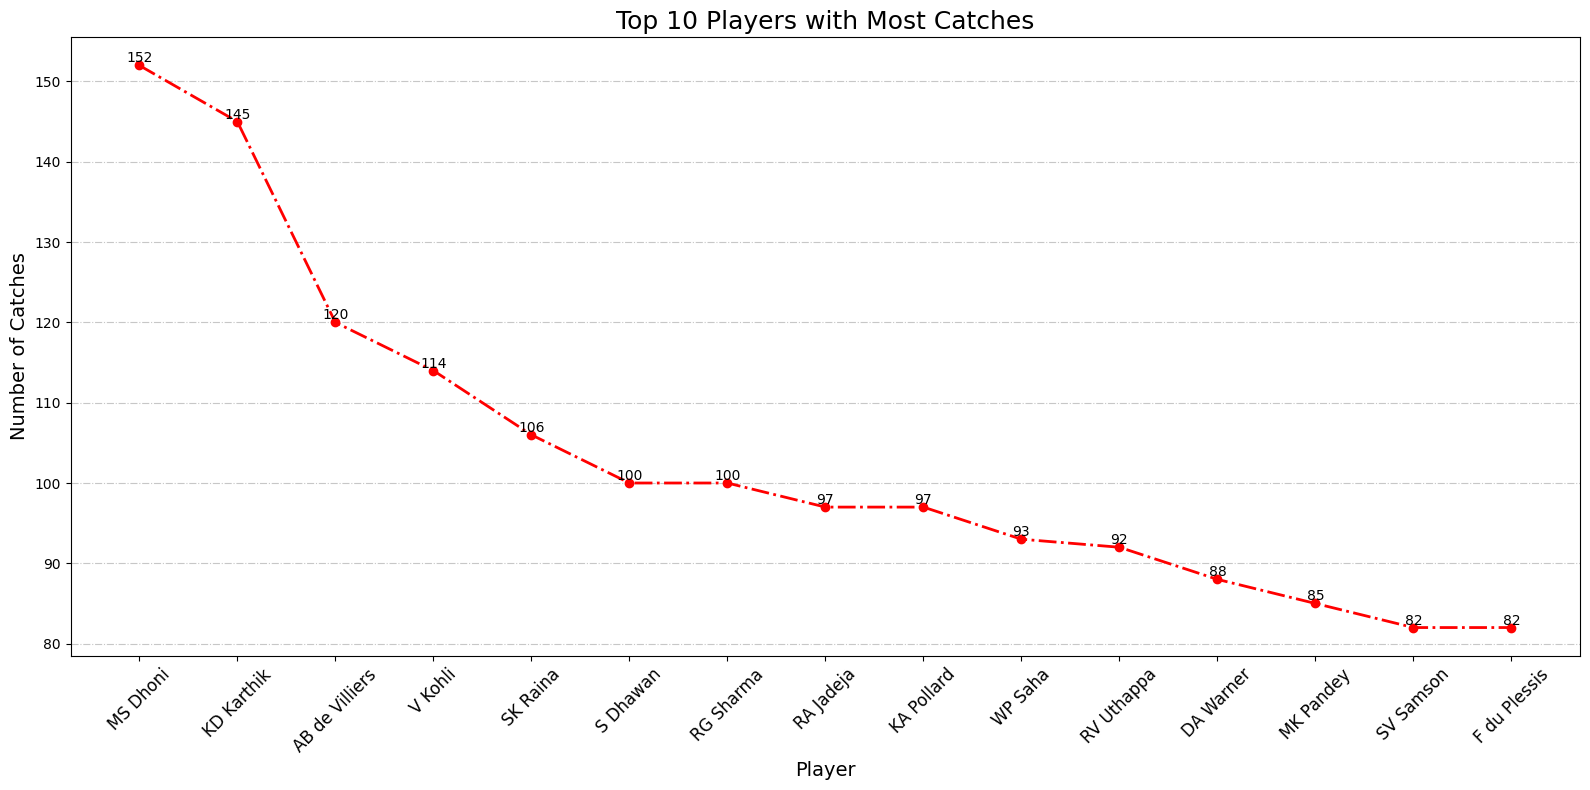

In [ ]:
catch_data = deliveries_data[deliveries_data['dismissal_kind'] == 'caught']

player_catches = catch_data['fielder'].value_counts().head(15)

plt.figure(figsize=(16, 8))
plt.plot(player_catches.index, player_catches.values, marker='o', color='red', linestyle='-.', linewidth=2)

plt.title('Top 10 Players with Most Catches', fontsize=18)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Catches', fontsize=14)

for i, value in enumerate(player_catches.values):
    plt.text(i, value, str(value), fontsize=10, ha='center', va='bottom')

plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.tight_layout()
plt.show()

**L. MATCH RESULTS BASED ON TOSS DECISIONS (STACKED BAR CHART)**  [VAIBHAV NEGI]

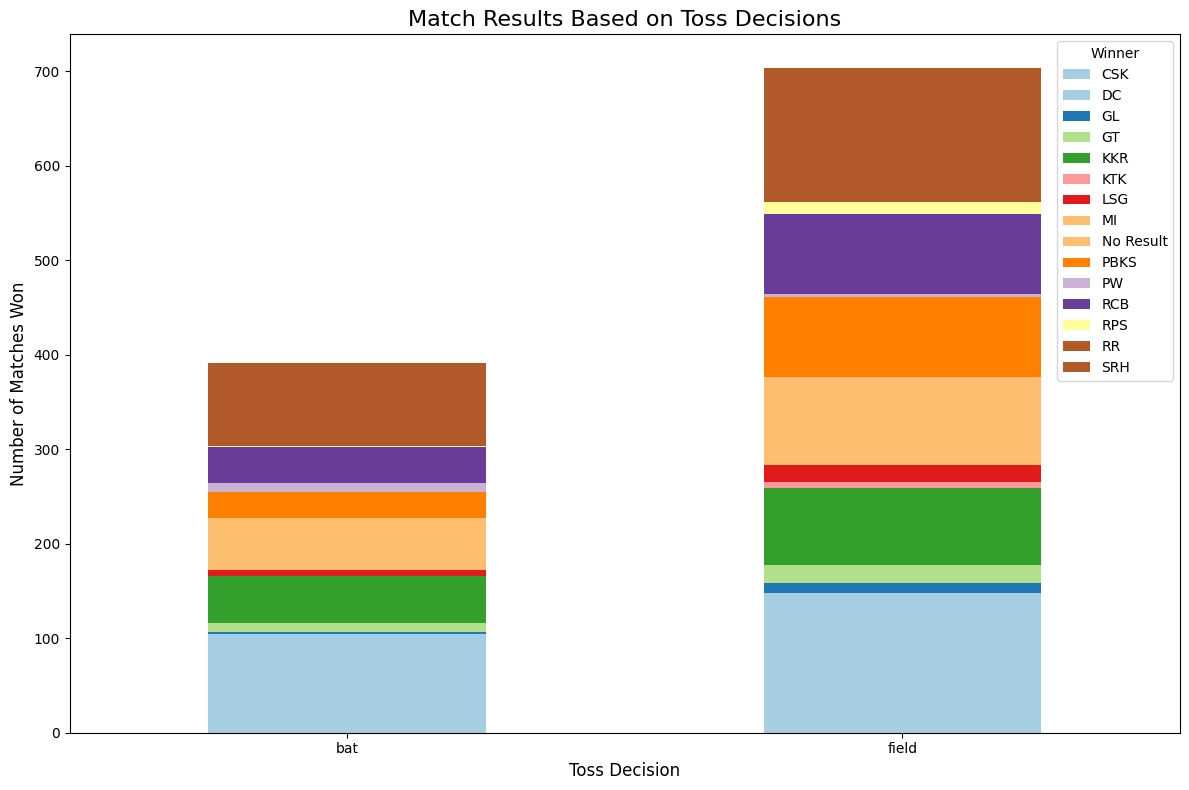

In [ ]:
toss_decision_results = matches_data.groupby(['toss_decision', 'winner']).size().unstack().fillna(0)

toss_decision_results.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title('Match Results Based on Toss Decisions', fontsize=16)
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Number of Matches Won', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Winner')
plt.tight_layout()
plt.show()

**M. WINNING MARGIN ANALYSIS (BOX PLOT)** [VAIBHAV NEGI]

<ipython-input-26-a8d41ba6e17f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




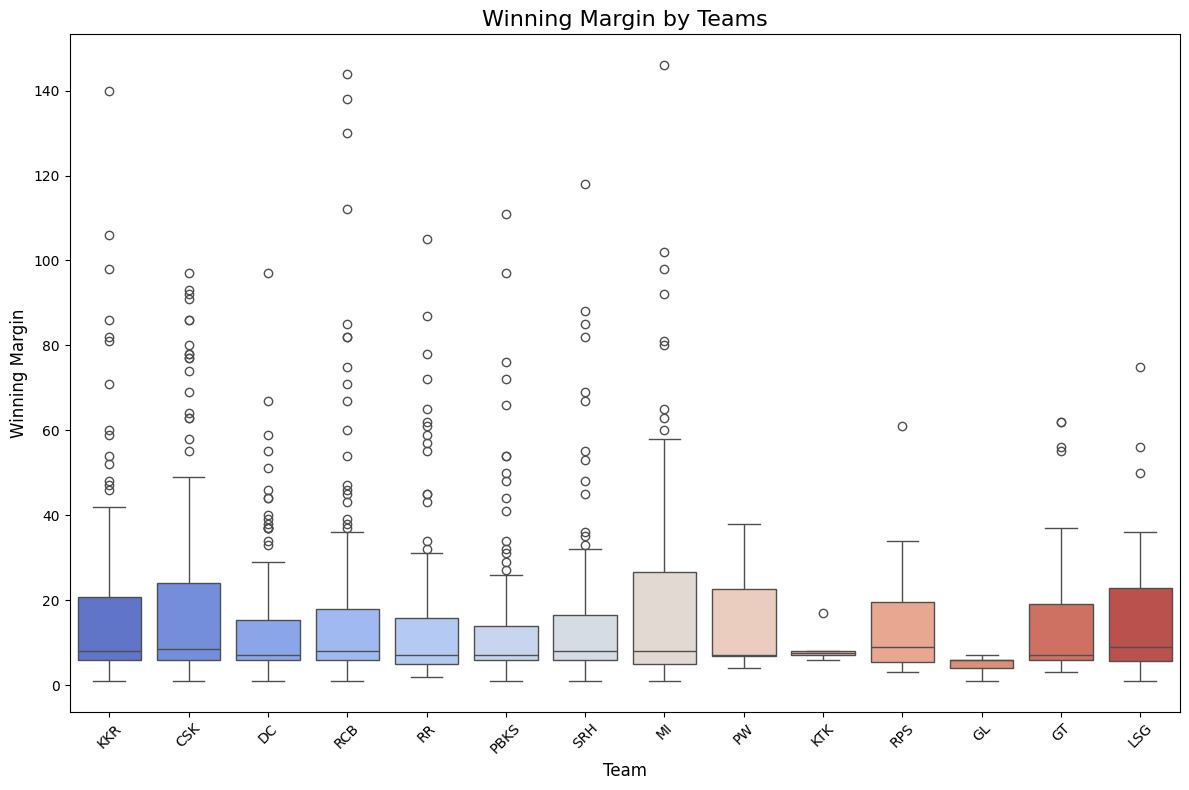

In [ ]:
matches_with_margin = matches_data[matches_data['result_margin'].notna()]

plt.figure(figsize=(12, 8))
sns.boxplot(x='winner', y='result_margin', data=matches_with_margin, palette='coolwarm')
plt.title('Winning Margin by Teams', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Winning Margin', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**N. DIFFERENT TYPES OF DISMISSALS** [MANOJ]

Index(['caught', 'bowled', 'run out', 'lbw', 'caught and bowled', 'stumped',
       'retired hurt', 'hit wicket', 'obstructing the field', 'retired out'],
      dtype='object', name='dismissal_kind')
[8063 2212 1114  800  367  358   15   15    3    3]
12950


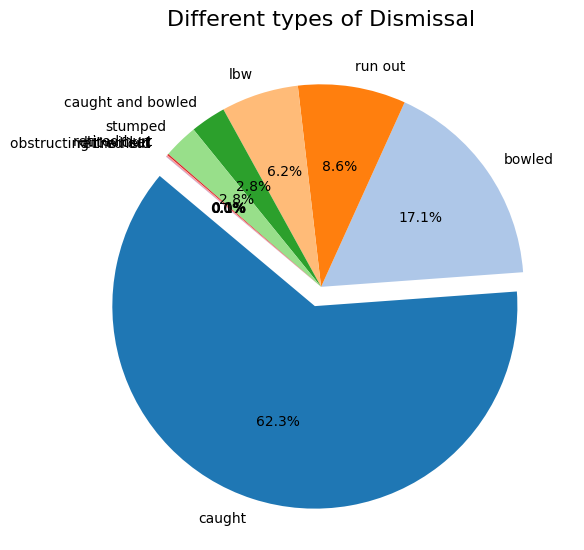

In [ ]:
valid_dismissals = deliveries_data[deliveries_data['dismissal_kind'] != 'None']
dismissal_counts = valid_dismissals['dismissal_kind'].value_counts()
labels = dismissal_counts.index
sizes = dismissal_counts.values

print(labels)
print(sizes)
print(np.sum(sizes))

explode = [0.1 if i == max(sizes) else 0 for i in sizes]
colors = plt.cm.tab20.colors[:len(labels)]
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors
)
plt.title('Different types of Dismissal', fontsize=16)
plt.tight_layout()
plt.show()

**O. WICKETS TAKEN IN EACH OVER** [MANOJ]

12950


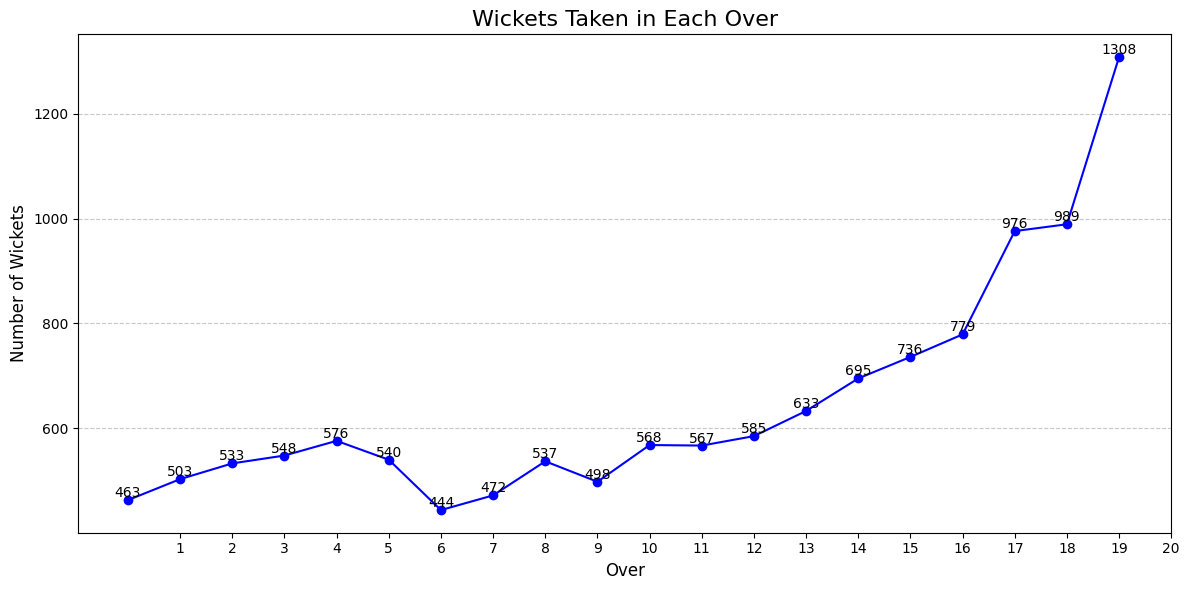

In [ ]:
wickets_data = deliveries_data[deliveries_data['dismissal_kind'] != 'None']

wickets_per_over = wickets_data['over'].value_counts().sort_index()

print(np.sum(wickets_per_over))

plt.figure(figsize=(12, 6))
plt.plot(wickets_per_over.index, wickets_per_over.values, marker='o', linestyle='-', color='blue')

plt.title('Wickets Taken in Each Over', fontsize=16)
plt.xlabel('Over', fontsize=12)
plt.ylabel('Number of Wickets', fontsize=12)

for x, y in zip(wickets_per_over.index, wickets_per_over.values):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')

plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**P. TOSS BASED DECISIONS** [MANOJ]

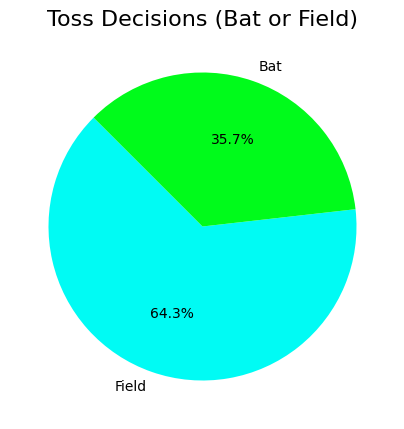

In [ ]:
toss_decision_counts = matches_data['toss_decision'].value_counts()

plt.figure(figsize=(5, 5))
toss_decision_counts.plot.pie(
    autopct='%1.1f%%',
    colors=["#00fbf4", "#00fb1b"],
    labels=["Field", "Bat"],
    #explode=[0, 0],
    startangle=135
)
plt.title("Toss Decisions (Bat or Field)", fontsize=16)
plt.ylabel("")
plt.show()

In [ ]:
import pandas as pd

# Load datasets
deliveries = pd.read_csv('/content/deliveries_processed.csv')
matches = pd.read_csv('/content/matches_processed.csv')

# Create a partnership column
deliveries['partnership'] = deliveries['batter'] + " & " + deliveries['non_striker']

# Add a column for boundaries (4s and 6s)
deliveries['boundary'] = deliveries['batsman_runs'].apply(lambda x: 1 if x in [4, 6] else 0)

# Aggregate data to calculate total runs, boundaries, and partnership metrics
partnership_data = deliveries.groupby(['match_id', 'partnership']).agg({
    'total_runs': 'sum',                           # Total runs scored by the partnership
    'batsman_runs': 'sum',                         # Runs by the batsman
    'boundary': 'sum'                              # Total boundaries (4s and 6s)
}).reset_index()

# Add boundary rate as a percentage
partnership_data['boundary_rate'] = partnership_data['boundary'] / partnership_data['total_runs'] * 100

# Identify top 10 partnerships by total runs
top_partnerships = partnership_data.sort_values(by='total_runs', ascending=False).head(10)

# Save processed data
top_partnerships.to_csv('/content/top_partnerships_funnel.csv', index=False)

# Display top partnerships
top_partnerships

,match_id,partnership,total_runs,batsman_runs,boundary,boundary_rate
23487,1304112,Q de Kock & KL Rahul,141,140,20,14.184397
12533,829795,AB de Villiers & V Kohli,138,133,23,16.666667
13905,980987,AB de Villiers & V Kohli,132,129,22,16.666667
8829,598027,CH Gayle & TM Dilshan,130,127,22,16.923077
7805,548372,CH Gayle & V Kohli,128,127,20,15.625000
5952,501260,AC Gilchrist & SE Marsh,126,105,17,13.492063
6833,548329,DA Warner & NV Ojha,119,109,17,14.285714
312,335994,AC Gilchrist & VVS Laxman,116,109,19,16.379310
17600,1175366,JM Bairstow & DA Warner,115,114,19,16.521739
19681,1216527,MA Agarwal & KL Rahul,113,106,17,15.044248
